# Feature engineering

**In this notebook, I will perform the following tasks**

* Drop unnecessary columns
* Data imputation
* Normalize data
* Export it as preprocessed

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from feature_engine.imputation import RandomSampleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset
dataset = pd.read_csv("C:/Users/steve/Desktop/Notebooks/Thesis-Project/Datasets/Raw/ADNI(Rawdata).csv")
dataset

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,3,0,81.3479,3,20.0,NaN,158.27,0.63,218.30,28.37,...,253.10,0.40,208.65,23.39,581.50,NaN,-2568.19,2.31,1176.0,3047.0
1,4,0,67.6904,1,27.0,0.06,147.64,0.55,173.64,44.72,...,220.88,0.48,215.70,33.74,641.90,3.33,4113.01,2.76,1942.0,3449.0
2,5,0,73.8027,0,29.0,0.10,199.66,0.55,222.27,41.18,...,220.37,0.54,232.18,29.18,708.36,2.87,-1388.41,3.18,2044.0,3441.0
3,8,1,84.5945,0,28.0,0.08,184.21,0.53,201.55,43.04,...,198.42,0.54,220.48,26.68,683.50,2.77,-2506.55,2.68,1959.0,2875.0
4,10,1,73.9726,3,24.0,0.11,233.02,0.48,229.88,39.46,...,196.55,0.53,210.63,26.60,645.95,2.72,-1164.02,2.64,1397.0,2700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,1201,1,75.6411,3,26.0,0.18,173.84,0.59,215.04,33.84,...,281.15,0.37,222.73,27.94,609.75,2.84,-1924.49,1.94,1112.0,2705.0
604,1221,0,71.2712,3,21.0,0.22,174.02,0.58,211.07,30.56,...,224.78,0.47,205.49,27.36,597.20,2.77,1146.39,2.44,1526.0,2913.0
605,1248,1,79.8548,3,23.0,0.19,199.31,0.56,229.63,33.13,...,220.41,0.48,214.97,27.16,639.47,2.79,-919.84,1.99,1215.0,2273.0
606,1253,1,62.7452,3,24.0,0.05,142.05,0.50,147.12,46.21,...,217.38,0.51,220.55,32.54,664.84,3.09,5289.89,3.27,2321.0,3739.0


Lets visualize how many data points are we missing

<Axes: >

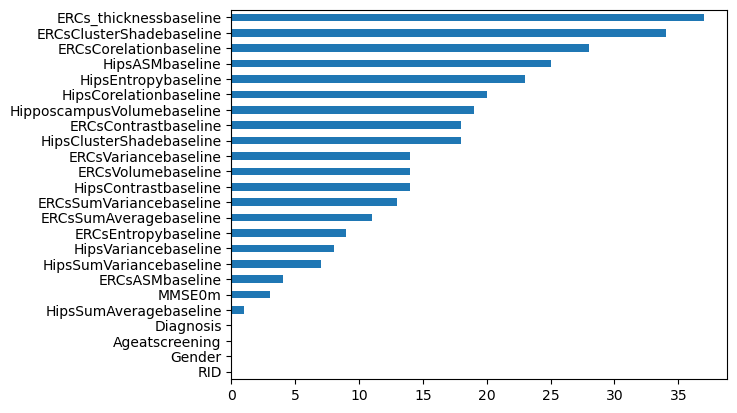

In [2]:
missing_data = dataset.isna().sum().sort_values()
missing_data.plot(kind='barh')

## Drop columns

We do miss quite a few. For starters, lets remove RID, Gender and Ageatscreening since these variables contribute little to none - as previously seen in our correlation matrix

In [3]:
dataset.drop(columns=["RID", "Gender", "Ageatscreening"], axis=1, inplace=True)

In [4]:
dataset.columns

Index(['Diagnosis', 'MMSE0m', 'HipsASMbaseline', 'HipsContrastbaseline',
       'HipsCorelationbaseline', 'HipsVariancebaseline',
       'HipsSumAveragebaseline', 'HipsSumVariancebaseline',
       'HipsEntropybaseline', 'HipsClusterShadebaseline', 'ERCsASMbaseline',
       'ERCsContrastbaseline', 'ERCsCorelationbaseline',
       'ERCsVariancebaseline', 'ERCsSumAveragebaseline',
       'ERCsSumVariancebaseline', 'ERCsEntropybaseline',
       'ERCsClusterShadebaseline', 'ERCs_thicknessbaseline',
       'ERCsVolumebaseline', 'HipposcampusVolumebaseline'],
      dtype='object')

Perfect. Now lets move to imputing the dataset

## Data imputation

Random sampling imputation is in principle similar to mean, median, and mode imputation in that it considers that missing values should look like those already existing in the distribution.

Random sampling consists of taking random observations from the pool of available data and using them to replace the NA. In random sample imputation, we take as many random observations as missing values exist in the variable.

In both numerical and categorical variables, the distribution of the variable is preserved by sampling observations at random to replace missing data. 

**Assumptions**

Random sample imputation assumes that the data is missing completely at random. In this scenario, it makes sense to substitute the missing values with values extracted at random from the original distribution. 

From a probabilistic point of view, values that are more frequent, like the mean or the median or the most frequent category, will be selected more often (because there are more of them to select from), but less frequent values will be selected as well. Thus, the distribution of the variables is preserved. 

In essence, we replace a population of missing values with a population of values with the same distribution of the original variable.

### Split the data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop("Diagnosis", axis=1),  
    dataset["Diagnosis"],  
    test_size=0.3,  
    random_state=0,  
)

X_train_copy = X_train.copy()
X_test_copy = X_train.copy()

X_train.shape, X_test.shape

((425, 20), (183, 20))

In [7]:
imputer  = RandomSampleImputer(random_state=42)
imputer.fit(X_train)

RandomSampleImputer(random_state=42)

In [8]:
imputer.variables_

['MMSE0m',
 'HipsASMbaseline',
 'HipsContrastbaseline',
 'HipsCorelationbaseline',
 'HipsVariancebaseline',
 'HipsSumAveragebaseline',
 'HipsSumVariancebaseline',
 'HipsEntropybaseline',
 'HipsClusterShadebaseline',
 'ERCsASMbaseline',
 'ERCsContrastbaseline',
 'ERCsCorelationbaseline',
 'ERCsVariancebaseline',
 'ERCsSumAveragebaseline',
 'ERCsSumVariancebaseline',
 'ERCsEntropybaseline',
 'ERCsClusterShadebaseline',
 'ERCs_thicknessbaseline',
 'ERCsVolumebaseline',
 'HipposcampusVolumebaseline']

Great. lets see if our imputation method worked

In [9]:
X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

X_train_t[imputer.variables_].isnull().sum()

MMSE0m                        0
HipsASMbaseline               0
HipsContrastbaseline          0
HipsCorelationbaseline        0
HipsVariancebaseline          0
HipsSumAveragebaseline        0
HipsSumVariancebaseline       0
HipsEntropybaseline           0
HipsClusterShadebaseline      0
ERCsASMbaseline               0
ERCsContrastbaseline          0
ERCsCorelationbaseline        0
ERCsVariancebaseline          0
ERCsSumAveragebaseline        0
ERCsSumVariancebaseline       0
ERCsEntropybaseline           0
ERCsClusterShadebaseline      0
ERCs_thicknessbaseline        0
ERCsVolumebaseline            0
HipposcampusVolumebaseline    0
dtype: int64

In [10]:
X_test_t[imputer.variables_].isnull().sum()

MMSE0m                        0
HipsASMbaseline               0
HipsContrastbaseline          0
HipsCorelationbaseline        0
HipsVariancebaseline          0
HipsSumAveragebaseline        0
HipsSumVariancebaseline       0
HipsEntropybaseline           0
HipsClusterShadebaseline      0
ERCsASMbaseline               0
ERCsContrastbaseline          0
ERCsCorelationbaseline        0
ERCsVariancebaseline          0
ERCsSumAveragebaseline        0
ERCsSumVariancebaseline       0
ERCsEntropybaseline           0
ERCsClusterShadebaseline      0
ERCs_thicknessbaseline        0
ERCsVolumebaseline            0
HipposcampusVolumebaseline    0
dtype: int64

Lets have a look as to how our imputed dataset is currently affected compared to the original one

#### Visualizing the difference between the imputed train dataset and the original one

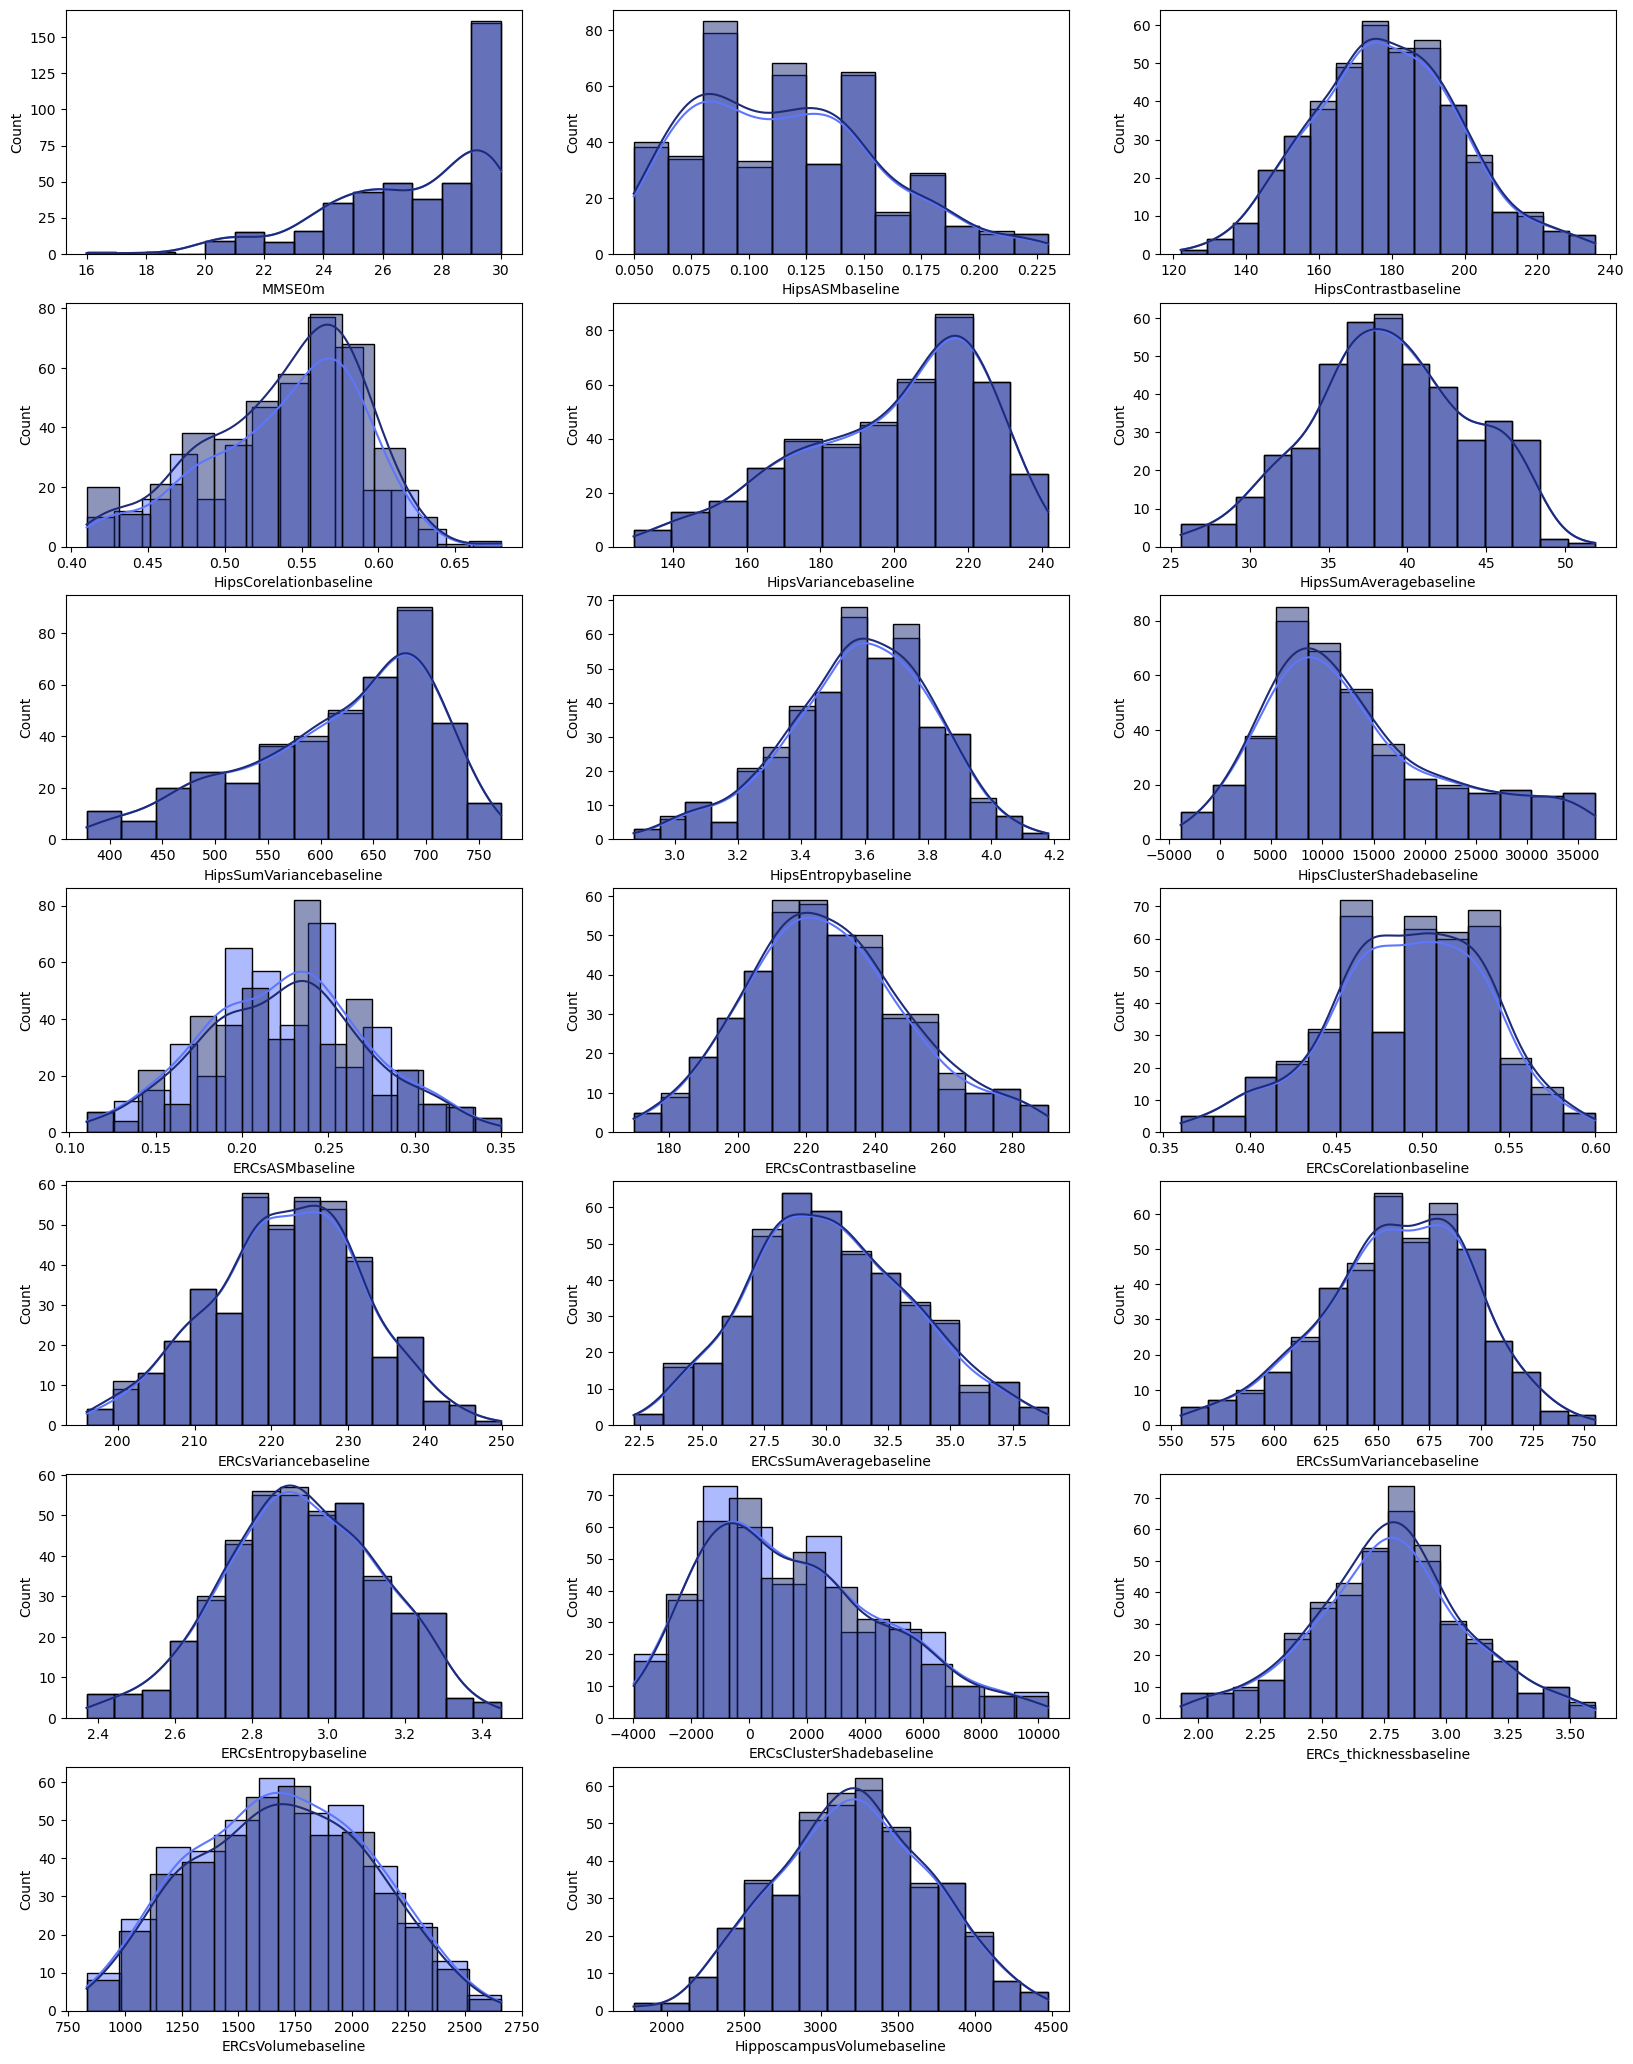

In [24]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train_copy.columns)):
    plt.subplot(12,3,i+1)
    sns.histplot(X_train_copy[X_train_copy.columns[i]], color="#5e76fe", kde=True)

    plt.subplot(12,3,i+1)
    sns.histplot(X_train_t[X_train_t.columns[i]], color= "#1e2c78", kde=True)

**Note**
* Light blue is the original copy of the dataset
* Navy is the imputed dataset

#### Visualizing the difference between the imputed test dataset and the original one

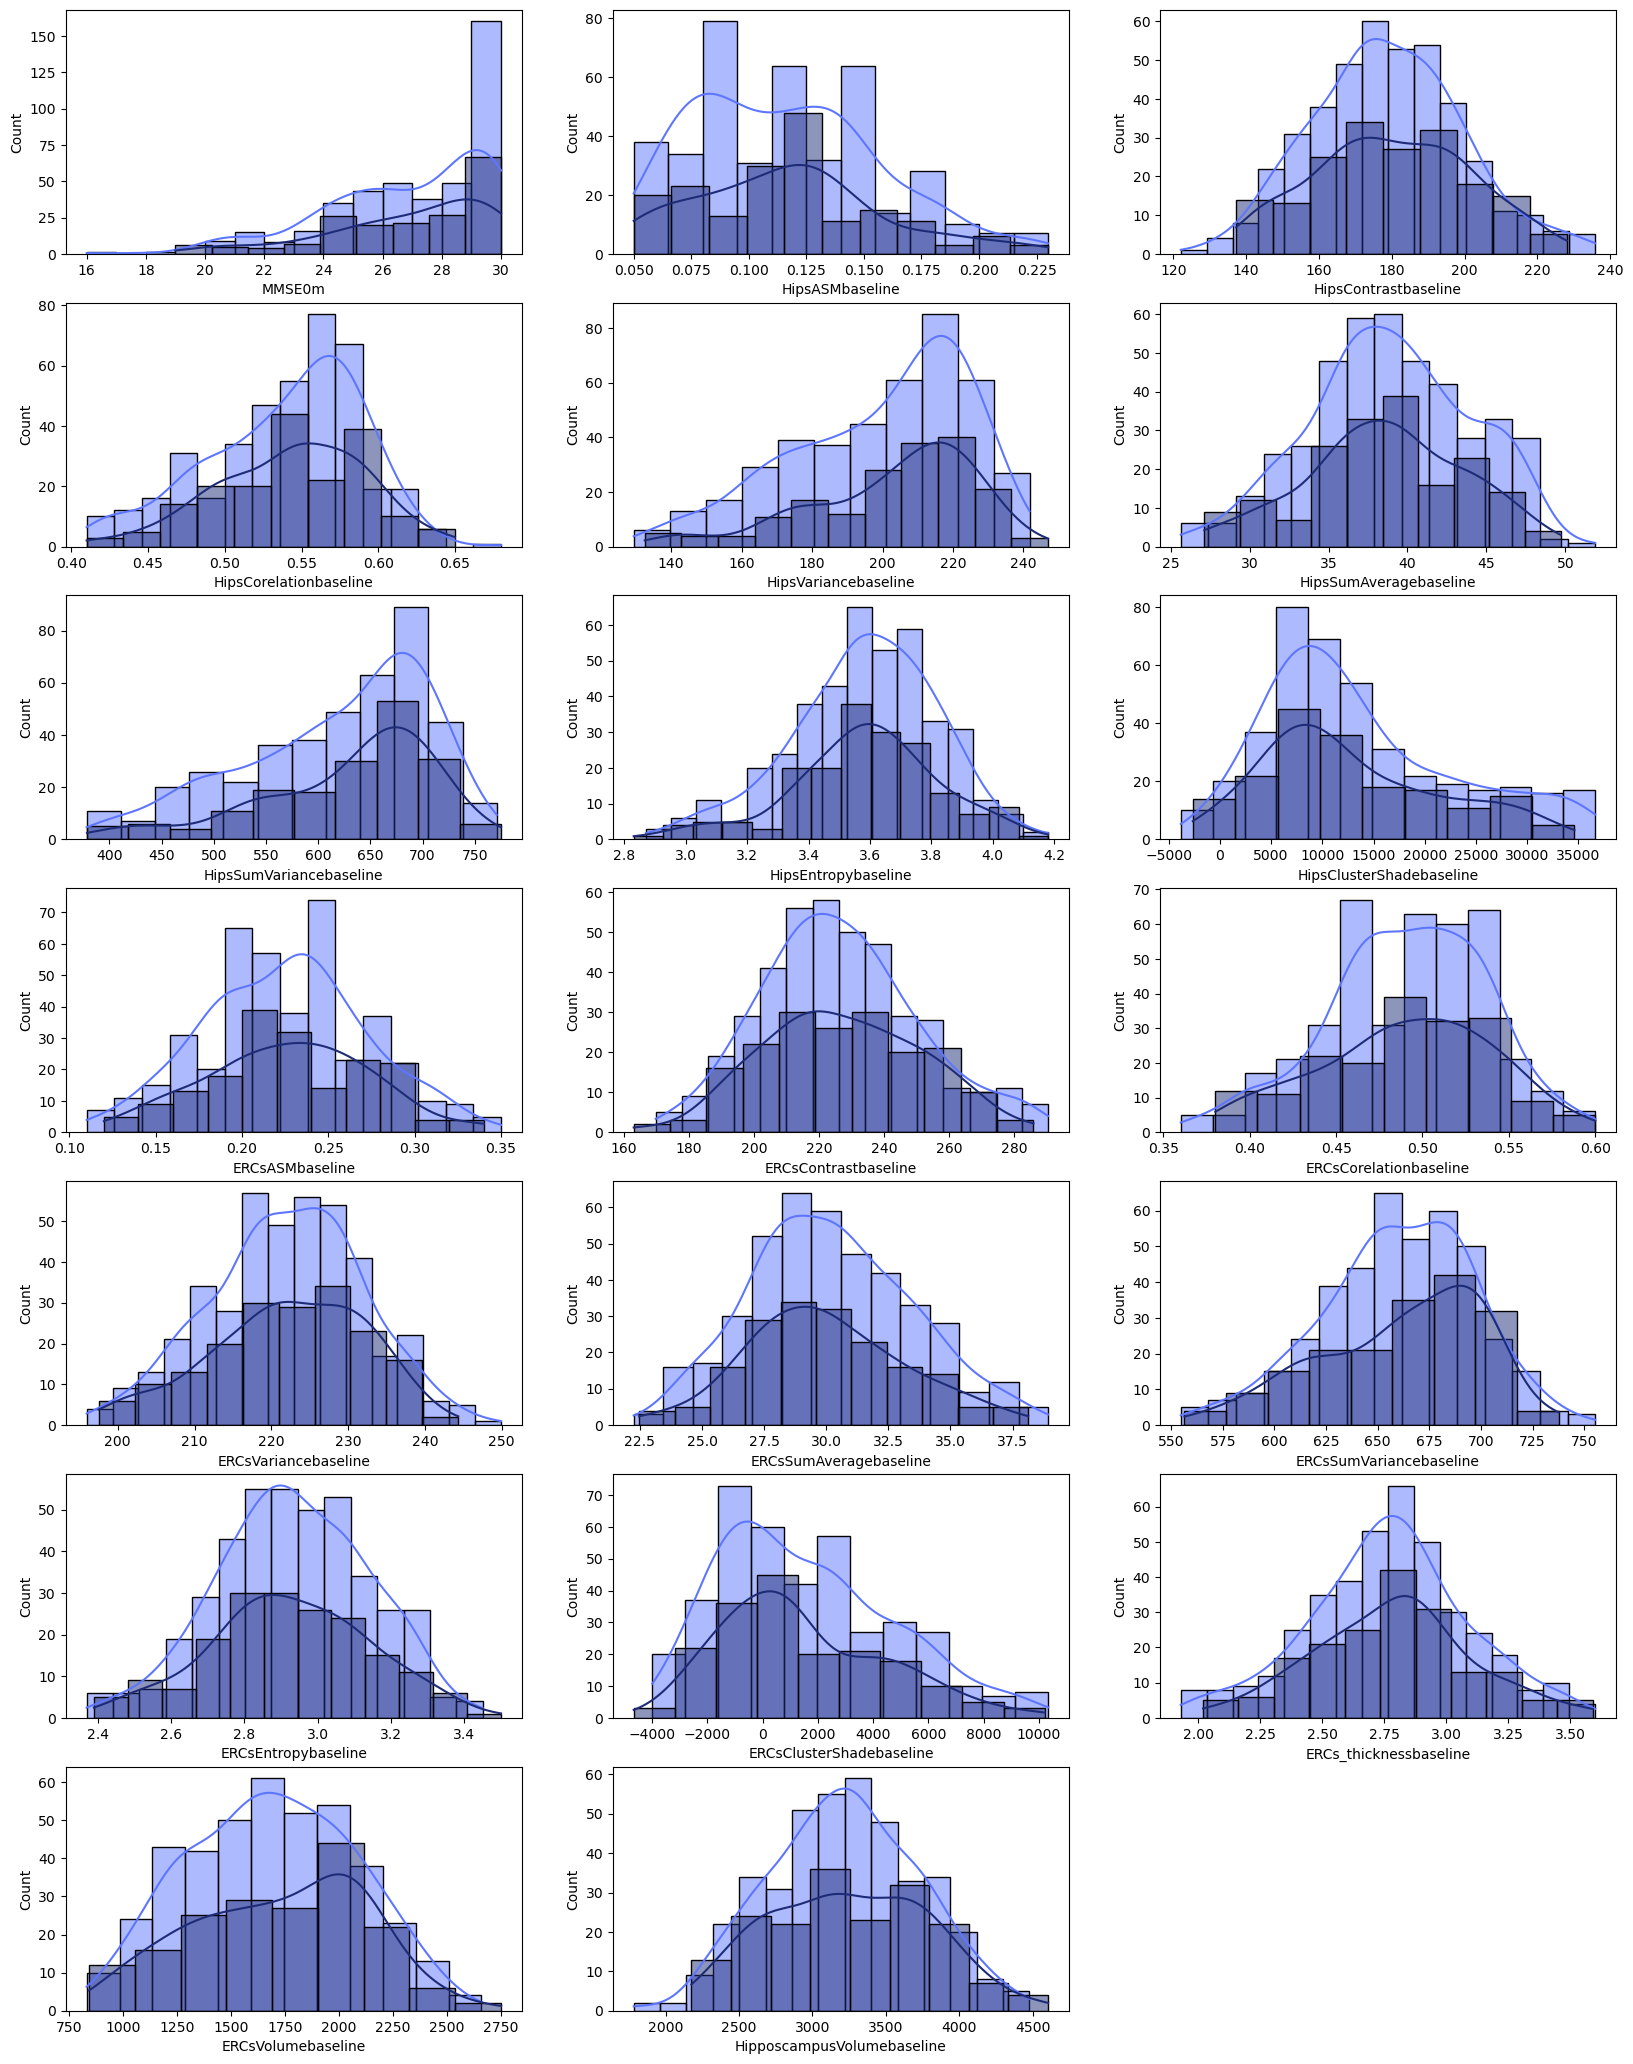

In [13]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_test_copy.columns)):
    plt.subplot(12,3,i+1)
    sns.histplot(X_test_copy[X_test_copy.columns[i]], color="#5e76fe", kde = True)

    plt.subplot(12,3,i+1)
    sns.histplot(X_test_t[X_test_t.columns[i]], color= "#1e2c78", kde = True)